In [2]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: OMC
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


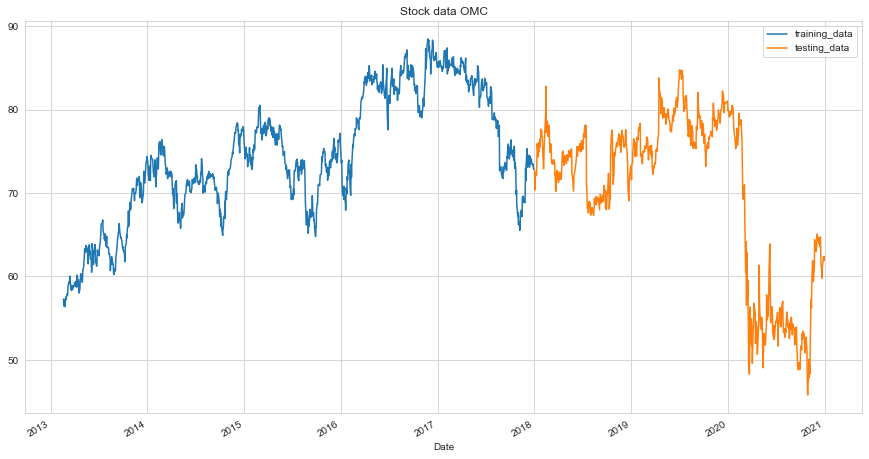

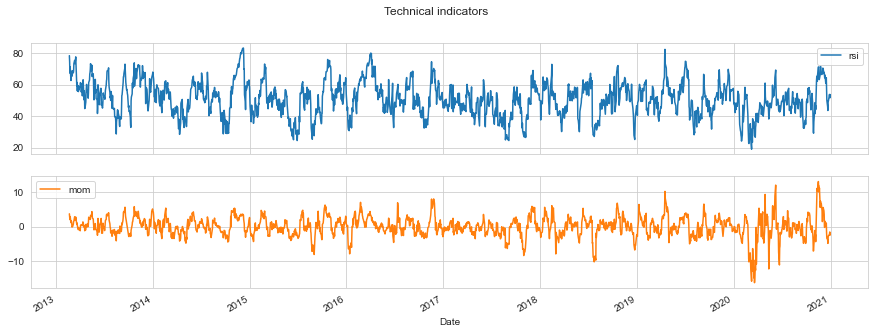

In [3]:
stock_name = 'omc'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [4]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1180.24, duration: 0:00:00.262059
episode: 2/2000, episode end value: 1209.40, duration: 0:00:00.235058
episode: 3/2000, episode end value: 1168.79, duration: 0:00:00.246051
episode: 4/2000, episode end value: 1182.69, duration: 0:00:00.250057
episode: 5/2000, episode end value: 1172.74, duration: 0:00:00.250055
episode: 6/2000, episode end value: 1213.16, duration: 0:00:00.248055
episode: 7/2000, episode end value: 1184.69, duration: 0:00:00.256057
episode: 8/2000, episode end value: 1194.69, duration: 0:00:00.251055
episode: 9/2000, episode end value: 1205.96, duration: 0:00:00.261062
episode: 10/2000, episode end value: 1184.37, duration: 0:00:00.246052
episode: 11/2000, episode end value: 1193.34, duration: 0:00:00.247054
episode: 12/2000, episode end value: 1186.79, duration: 0:00:00.270060
episode: 13/2000, episode end value: 1178.94, duration: 0:00:00.317074
episode: 14/2000, episode end value: 1156.23, duration: 0:00:00.277057
episode: 15/200

episode: 117/2000, episode end value: 1168.58, duration: 0:00:00.376081
episode: 118/2000, episode end value: 1172.12, duration: 0:00:00.332075
episode: 119/2000, episode end value: 1171.11, duration: 0:00:00.372085
episode: 120/2000, episode end value: 1164.95, duration: 0:00:00.458104
episode: 121/2000, episode end value: 1185.74, duration: 0:00:00.424097
episode: 122/2000, episode end value: 1186.87, duration: 0:00:00.423094
episode: 123/2000, episode end value: 1175.50, duration: 0:00:00.417092
episode: 124/2000, episode end value: 1179.57, duration: 0:00:00.433100
episode: 125/2000, episode end value: 1171.44, duration: 0:00:00.448104
episode: 126/2000, episode end value: 1205.56, duration: 0:00:00.395642
episode: 127/2000, episode end value: 1185.44, duration: 0:00:00.373376
episode: 128/2000, episode end value: 1188.38, duration: 0:00:00.439866
episode: 129/2000, episode end value: 1197.90, duration: 0:00:00.436100
episode: 130/2000, episode end value: 1192.16, duration: 0:00:00

episode: 231/2000, episode end value: 1180.07, duration: 0:00:00.394088
episode: 232/2000, episode end value: 1177.70, duration: 0:00:00.375086
episode: 233/2000, episode end value: 1190.70, duration: 0:00:00.300068
episode: 234/2000, episode end value: 1183.98, duration: 0:00:00.363081
episode: 235/2000, episode end value: 1188.07, duration: 0:00:00.388085
episode: 236/2000, episode end value: 1202.70, duration: 0:00:00.355079
episode: 237/2000, episode end value: 1180.50, duration: 0:00:00.346081
episode: 238/2000, episode end value: 1179.23, duration: 0:00:00.389085
episode: 239/2000, episode end value: 1181.08, duration: 0:00:00.359081
episode: 240/2000, episode end value: 1193.26, duration: 0:00:00.329071
episode: 241/2000, episode end value: 1185.78, duration: 0:00:00.335077
episode: 242/2000, episode end value: 1200.53, duration: 0:00:00.353079
episode: 243/2000, episode end value: 1174.97, duration: 0:00:00.333075
episode: 244/2000, episode end value: 1180.51, duration: 0:00:00

episode: 345/2000, episode end value: 1193.55, duration: 0:00:00.394087
episode: 346/2000, episode end value: 1189.23, duration: 0:00:00.456103
episode: 347/2000, episode end value: 1186.39, duration: 0:00:00.432096
episode: 348/2000, episode end value: 1193.73, duration: 0:00:00.512119
episode: 349/2000, episode end value: 1195.87, duration: 0:00:00.446100
episode: 350/2000, episode end value: 1190.98, duration: 0:00:00.452103
episode: 351/2000, episode end value: 1205.62, duration: 0:00:00.453109
episode: 352/2000, episode end value: 1185.19, duration: 0:00:00.503109
episode: 353/2000, episode end value: 1190.97, duration: 0:00:00.428102
episode: 354/2000, episode end value: 1192.02, duration: 0:00:00.368968
episode: 355/2000, episode end value: 1185.98, duration: 0:00:00.392685
episode: 356/2000, episode end value: 1196.73, duration: 0:00:00.383087
episode: 357/2000, episode end value: 1182.84, duration: 0:00:00.399089
episode: 358/2000, episode end value: 1188.45, duration: 0:00:00

episode: 459/2000, episode end value: 1198.97, duration: 0:00:00.379083
episode: 460/2000, episode end value: 1193.17, duration: 0:00:00.463107
episode: 461/2000, episode end value: 1190.81, duration: 0:00:00.466108
episode: 462/2000, episode end value: 1192.08, duration: 0:00:00.429097
episode: 463/2000, episode end value: 1191.62, duration: 0:00:00.409087
episode: 464/2000, episode end value: 1182.37, duration: 0:00:00.442096
episode: 465/2000, episode end value: 1191.94, duration: 0:00:00.420093
episode: 466/2000, episode end value: 1184.69, duration: 0:00:00.452101
episode: 467/2000, episode end value: 1183.99, duration: 0:00:00.389087
episode: 468/2000, episode end value: 1187.21, duration: 0:00:00.434098
episode: 469/2000, episode end value: 1188.63, duration: 0:00:00.403090
episode: 470/2000, episode end value: 1184.39, duration: 0:00:00.413098
episode: 471/2000, episode end value: 1190.71, duration: 0:00:00.466101
episode: 472/2000, episode end value: 1191.81, duration: 0:00:00

episode: 573/2000, episode end value: 1197.89, duration: 0:00:00.585130
episode: 574/2000, episode end value: 1195.44, duration: 0:00:00.475114
episode: 575/2000, episode end value: 1193.25, duration: 0:00:00.542123
episode: 576/2000, episode end value: 1192.77, duration: 0:00:00.622145
episode: 577/2000, episode end value: 1203.27, duration: 0:00:00.491110
episode: 578/2000, episode end value: 1191.64, duration: 0:00:00.609137
episode: 579/2000, episode end value: 1187.38, duration: 0:00:00.545123
episode: 580/2000, episode end value: 1184.62, duration: 0:00:00.466102
episode: 581/2000, episode end value: 1189.29, duration: 0:00:00.424101
episode: 582/2000, episode end value: 1184.24, duration: 0:00:00.413096
episode: 583/2000, episode end value: 1210.77, duration: 0:00:00.382083
episode: 584/2000, episode end value: 1188.49, duration: 0:00:00.410097
episode: 585/2000, episode end value: 1195.15, duration: 0:00:00.380778
episode: 586/2000, episode end value: 1191.59, duration: 0:00:00

episode: 687/2000, episode end value: 1194.17, duration: 0:00:00.498112
episode: 688/2000, episode end value: 1194.60, duration: 0:00:00.391086
episode: 689/2000, episode end value: 1189.49, duration: 0:00:00.420098
episode: 690/2000, episode end value: 1195.16, duration: 0:00:00.427089
episode: 691/2000, episode end value: 1204.71, duration: 0:00:00.429095
episode: 692/2000, episode end value: 1192.94, duration: 0:00:00.460105
episode: 693/2000, episode end value: 1186.50, duration: 0:00:00.498118
episode: 694/2000, episode end value: 1206.79, duration: 0:00:00.453100
episode: 695/2000, episode end value: 1195.38, duration: 0:00:00.430097
episode: 696/2000, episode end value: 1188.58, duration: 0:00:00.508116
episode: 697/2000, episode end value: 1193.41, duration: 0:00:00.434092
episode: 698/2000, episode end value: 1188.86, duration: 0:00:00.438200
episode: 699/2000, episode end value: 1194.66, duration: 0:00:00.505113
episode: 700/2000, episode end value: 1194.74, duration: 0:00:00

episode: 801/2000, episode end value: 1191.28, duration: 0:00:00.409092
episode: 802/2000, episode end value: 1186.25, duration: 0:00:00.378085
episode: 803/2000, episode end value: 1191.99, duration: 0:00:00.374078
episode: 804/2000, episode end value: 1192.38, duration: 0:00:00.424096
episode: 805/2000, episode end value: 1193.13, duration: 0:00:00.376082
episode: 806/2000, episode end value: 1193.56, duration: 0:00:00.466106
episode: 807/2000, episode end value: 1195.21, duration: 0:00:00.363086
episode: 808/2000, episode end value: 1204.46, duration: 0:00:00.402088
episode: 809/2000, episode end value: 1201.29, duration: 0:00:00.358079
episode: 810/2000, episode end value: 1187.28, duration: 0:00:00.397090
episode: 811/2000, episode end value: 1192.21, duration: 0:00:00.380089
episode: 812/2000, episode end value: 1191.73, duration: 0:00:00.431096
episode: 813/2000, episode end value: 1199.51, duration: 0:00:00.461104
episode: 814/2000, episode end value: 1184.62, duration: 0:00:00

episode: 915/2000, episode end value: 1200.25, duration: 0:00:00.392085
episode: 916/2000, episode end value: 1192.04, duration: 0:00:00.421097
episode: 917/2000, episode end value: 1197.27, duration: 0:00:00.426097
episode: 918/2000, episode end value: 1201.85, duration: 0:00:00.378082
episode: 919/2000, episode end value: 1191.09, duration: 0:00:00.374085
episode: 920/2000, episode end value: 1208.62, duration: 0:00:00.338076
episode: 921/2000, episode end value: 1198.10, duration: 0:00:00.410091
episode: 922/2000, episode end value: 1194.94, duration: 0:00:00.359079
episode: 923/2000, episode end value: 1199.42, duration: 0:00:00.380088
episode: 924/2000, episode end value: 1195.60, duration: 0:00:00.353080
episode: 925/2000, episode end value: 1187.04, duration: 0:00:00.402088
episode: 926/2000, episode end value: 1202.06, duration: 0:00:00.355078
episode: 927/2000, episode end value: 1183.15, duration: 0:00:00.426097
episode: 928/2000, episode end value: 1189.39, duration: 0:00:00

episode: 1029/2000, episode end value: 1187.77, duration: 0:00:00.372082
episode: 1030/2000, episode end value: 1200.17, duration: 0:00:00.364083
episode: 1031/2000, episode end value: 1198.91, duration: 0:00:00.361080
episode: 1032/2000, episode end value: 1181.64, duration: 0:00:00.393087
episode: 1033/2000, episode end value: 1183.57, duration: 0:00:00.389088
episode: 1034/2000, episode end value: 1185.25, duration: 0:00:00.358083
episode: 1035/2000, episode end value: 1188.63, duration: 0:00:00.422089
episode: 1036/2000, episode end value: 1198.32, duration: 0:00:00.453105
episode: 1037/2000, episode end value: 1188.70, duration: 0:00:00.361081
episode: 1038/2000, episode end value: 1196.75, duration: 0:00:00.405097
episode: 1039/2000, episode end value: 1201.61, duration: 0:00:00.423095
episode: 1040/2000, episode end value: 1188.60, duration: 0:00:00.417093
episode: 1041/2000, episode end value: 1194.41, duration: 0:00:00.469105
episode: 1042/2000, episode end value: 1191.94, dur

episode: 1142/2000, episode end value: 1189.95, duration: 0:00:00.411092
episode: 1143/2000, episode end value: 1187.66, duration: 0:00:00.381083
episode: 1144/2000, episode end value: 1193.96, duration: 0:00:00.470110
episode: 1145/2000, episode end value: 1194.15, duration: 0:00:00.391085
episode: 1146/2000, episode end value: 1188.45, duration: 0:00:00.409091
episode: 1147/2000, episode end value: 1192.98, duration: 0:00:00.363087
episode: 1148/2000, episode end value: 1183.44, duration: 0:00:00.396091
episode: 1149/2000, episode end value: 1189.94, duration: 0:00:00.409090
episode: 1150/2000, episode end value: 1189.13, duration: 0:00:00.387086
episode: 1151/2000, episode end value: 1194.97, duration: 0:00:00.343077
episode: 1152/2000, episode end value: 1188.39, duration: 0:00:00.355081
episode: 1153/2000, episode end value: 1187.43, duration: 0:00:00.368087
episode: 1154/2000, episode end value: 1196.31, duration: 0:00:00.400084
episode: 1155/2000, episode end value: 1197.74, dur

episode: 1255/2000, episode end value: 1195.06, duration: 0:00:00.360079
episode: 1256/2000, episode end value: 1194.01, duration: 0:00:00.380086
episode: 1257/2000, episode end value: 1196.90, duration: 0:00:00.380087
episode: 1258/2000, episode end value: 1194.39, duration: 0:00:00.378084
episode: 1259/2000, episode end value: 1195.99, duration: 0:00:00.377084
episode: 1260/2000, episode end value: 1196.16, duration: 0:00:00.390089
episode: 1261/2000, episode end value: 1192.74, duration: 0:00:00.386085
episode: 1262/2000, episode end value: 1193.18, duration: 0:00:00.388088
episode: 1263/2000, episode end value: 1200.31, duration: 0:00:00.391087
episode: 1264/2000, episode end value: 1184.67, duration: 0:00:00.371084
episode: 1265/2000, episode end value: 1188.67, duration: 0:00:00.421094
episode: 1266/2000, episode end value: 1201.39, duration: 0:00:00.400089
episode: 1267/2000, episode end value: 1189.97, duration: 0:00:00.390084
episode: 1268/2000, episode end value: 1194.24, dur

episode: 1368/2000, episode end value: 1188.45, duration: 0:00:00.352087
episode: 1369/2000, episode end value: 1191.95, duration: 0:00:00.331068
episode: 1370/2000, episode end value: 1196.33, duration: 0:00:00.312067
episode: 1371/2000, episode end value: 1196.59, duration: 0:00:00.304068
episode: 1372/2000, episode end value: 1206.46, duration: 0:00:00.281063
episode: 1373/2000, episode end value: 1190.17, duration: 0:00:00.304068
episode: 1374/2000, episode end value: 1185.39, duration: 0:00:00.318071
episode: 1375/2000, episode end value: 1199.30, duration: 0:00:00.292067
episode: 1376/2000, episode end value: 1188.93, duration: 0:00:00.301064
episode: 1377/2000, episode end value: 1183.70, duration: 0:00:00.326073
episode: 1378/2000, episode end value: 1190.60, duration: 0:00:00.302065
episode: 1379/2000, episode end value: 1193.35, duration: 0:00:00.305068
episode: 1380/2000, episode end value: 1192.55, duration: 0:00:00.324075
episode: 1381/2000, episode end value: 1196.44, dur

episode: 1481/2000, episode end value: 1196.77, duration: 0:00:00.303068
episode: 1482/2000, episode end value: 1187.82, duration: 0:00:00.364082
episode: 1483/2000, episode end value: 1201.43, duration: 0:00:00.349076
episode: 1484/2000, episode end value: 1186.43, duration: 0:00:00.305071
episode: 1485/2000, episode end value: 1194.67, duration: 0:00:00.319069
episode: 1486/2000, episode end value: 1209.07, duration: 0:00:00.341076
episode: 1487/2000, episode end value: 1198.32, duration: 0:00:00.313071
episode: 1488/2000, episode end value: 1189.31, duration: 0:00:00.320071
episode: 1489/2000, episode end value: 1187.49, duration: 0:00:00.343078
episode: 1490/2000, episode end value: 1195.09, duration: 0:00:00.308070
episode: 1491/2000, episode end value: 1190.95, duration: 0:00:00.330069
episode: 1492/2000, episode end value: 1198.10, duration: 0:00:00.328078
episode: 1493/2000, episode end value: 1200.31, duration: 0:00:00.341076
episode: 1494/2000, episode end value: 1202.29, dur

episode: 1594/2000, episode end value: 1184.02, duration: 0:00:00.325077
episode: 1595/2000, episode end value: 1197.49, duration: 0:00:00.310070
episode: 1596/2000, episode end value: 1192.71, duration: 0:00:00.377085
episode: 1597/2000, episode end value: 1194.22, duration: 0:00:00.364081
episode: 1598/2000, episode end value: 1203.13, duration: 0:00:00.358081
episode: 1599/2000, episode end value: 1191.07, duration: 0:00:00.364081
episode: 1600/2000, episode end value: 1194.67, duration: 0:00:00.340080
episode: 1601/2000, episode end value: 1193.05, duration: 0:00:00.342073
episode: 1602/2000, episode end value: 1193.57, duration: 0:00:00.334075
episode: 1603/2000, episode end value: 1198.57, duration: 0:00:00.322066
episode: 1604/2000, episode end value: 1191.96, duration: 0:00:00.311070
episode: 1605/2000, episode end value: 1189.62, duration: 0:00:00.355082
episode: 1606/2000, episode end value: 1185.29, duration: 0:00:00.374085
episode: 1607/2000, episode end value: 1191.59, dur

episode: 1707/2000, episode end value: 1196.23, duration: 0:00:00.317072
episode: 1708/2000, episode end value: 1205.57, duration: 0:00:00.311070
episode: 1709/2000, episode end value: 1192.30, duration: 0:00:00.308068
episode: 1710/2000, episode end value: 1192.35, duration: 0:00:00.311070
episode: 1711/2000, episode end value: 1198.11, duration: 0:00:00.331088
episode: 1712/2000, episode end value: 1194.49, duration: 0:00:00.326051
episode: 1713/2000, episode end value: 1200.69, duration: 0:00:00.338076
episode: 1714/2000, episode end value: 1202.53, duration: 0:00:00.320069
episode: 1715/2000, episode end value: 1192.60, duration: 0:00:00.310070
episode: 1716/2000, episode end value: 1207.38, duration: 0:00:00.314073
episode: 1717/2000, episode end value: 1194.27, duration: 0:00:00.321070
episode: 1718/2000, episode end value: 1195.10, duration: 0:00:00.335076
episode: 1719/2000, episode end value: 1201.74, duration: 0:00:00.347077
episode: 1720/2000, episode end value: 1195.13, dur

episode: 1820/2000, episode end value: 1196.27, duration: 0:00:00.288061
episode: 1821/2000, episode end value: 1197.57, duration: 0:00:00.290064
episode: 1822/2000, episode end value: 1203.01, duration: 0:00:00.317072
episode: 1823/2000, episode end value: 1189.31, duration: 0:00:00.329074
episode: 1824/2000, episode end value: 1198.35, duration: 0:00:00.295066
episode: 1825/2000, episode end value: 1191.37, duration: 0:00:00.335074
episode: 1826/2000, episode end value: 1191.78, duration: 0:00:00.332077
episode: 1827/2000, episode end value: 1189.03, duration: 0:00:00.305062
episode: 1828/2000, episode end value: 1204.21, duration: 0:00:00.311070
episode: 1829/2000, episode end value: 1210.54, duration: 0:00:00.317070
episode: 1830/2000, episode end value: 1194.17, duration: 0:00:00.327074
episode: 1831/2000, episode end value: 1193.38, duration: 0:00:00.310068
episode: 1832/2000, episode end value: 1193.75, duration: 0:00:00.322072
episode: 1833/2000, episode end value: 1199.08, dur

episode: 1933/2000, episode end value: 1202.40, duration: 0:00:00.305071
episode: 1934/2000, episode end value: 1192.48, duration: 0:00:00.297066
episode: 1935/2000, episode end value: 1206.11, duration: 0:00:00.305068
episode: 1936/2000, episode end value: 1186.83, duration: 0:00:00.318075
episode: 1937/2000, episode end value: 1188.99, duration: 0:00:00.349080
episode: 1938/2000, episode end value: 1195.44, duration: 0:00:00.428094
episode: 1939/2000, episode end value: 1190.60, duration: 0:00:00.381084
episode: 1940/2000, episode end value: 1182.24, duration: 0:00:00.347094
episode: 1941/2000, episode end value: 1186.56, duration: 0:00:00.300051
episode: 1942/2000, episode end value: 1190.28, duration: 0:00:00.300069
episode: 1943/2000, episode end value: 1189.52, duration: 0:00:00.311072
episode: 1944/2000, episode end value: 1200.47, duration: 0:00:00.302067
episode: 1945/2000, episode end value: 1184.45, duration: 0:00:00.301067
episode: 1946/2000, episode end value: 1188.87, dur

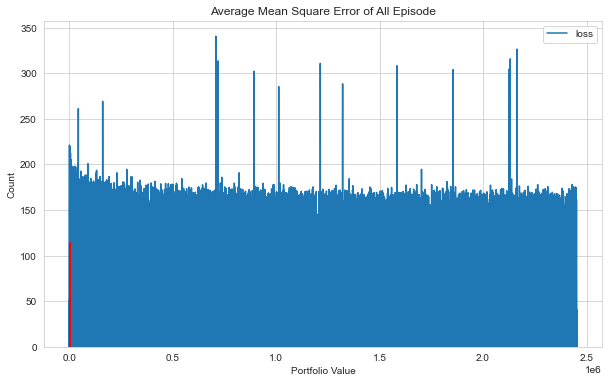

In [5]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

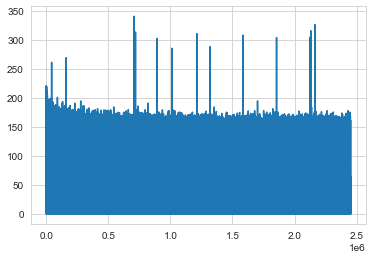

In [6]:
plt.plot(agent.model.losses)

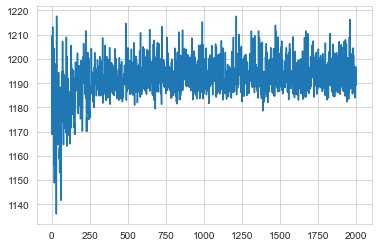

In [7]:
plt.plot(portfolio_value)

episode end value: 1059.81, duration: 0:00:00.101007
Sell: 290 times, Buy: 266 times


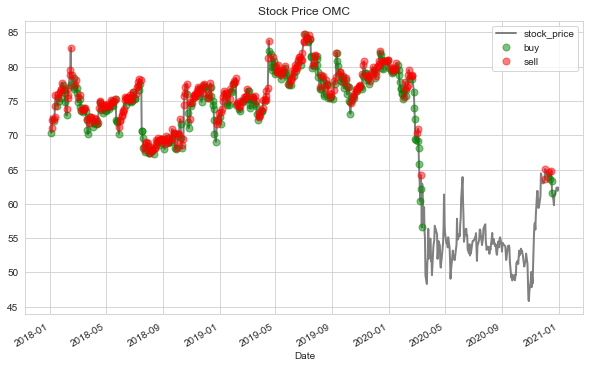

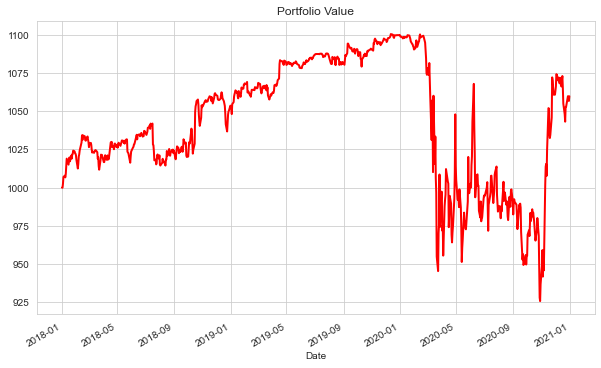

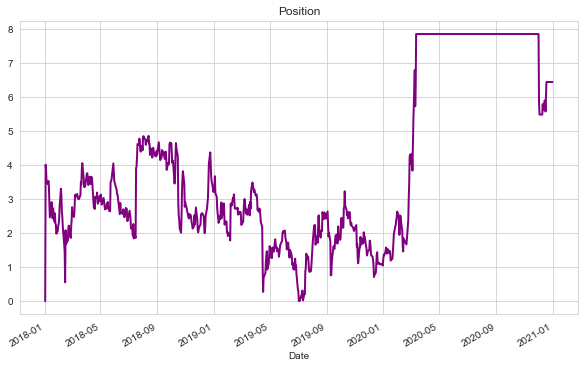

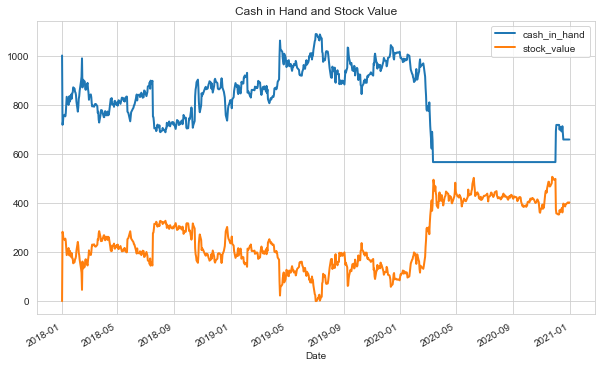

In [8]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [9]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: OMC
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 1.96 %
Volatility: 0.1228
shape ratio: 0.0697
Maximun drawdown: -15.88 %
Calmar ratio: 0.1231
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -5.01 %
Volatility (benchmark): 0.3342
shape ratio: -0.1828
Maximun drawdown: -45.97 %
Calmar ratio (benchmark): -0.1090


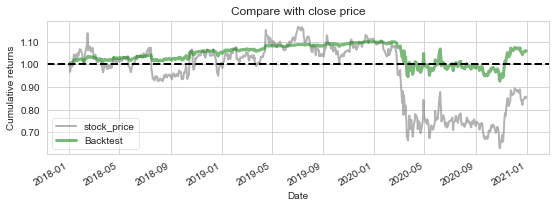

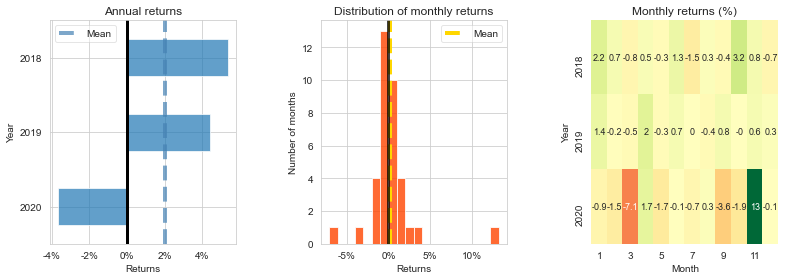

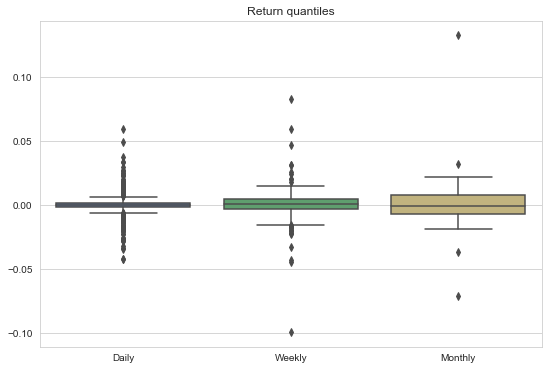

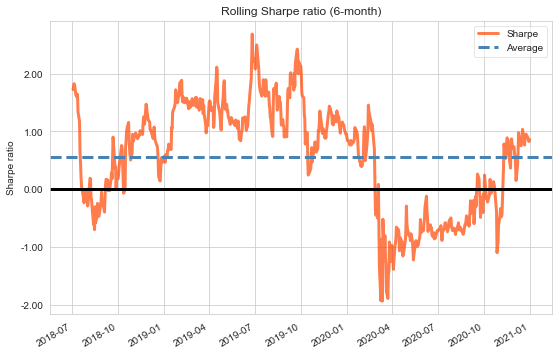

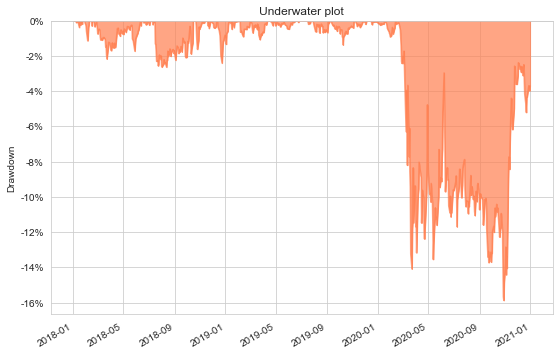

In [10]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')